In [59]:
import pandas as pd

In [60]:
gamesDF = pd.read_csv(r'C:\Users\lavin\Desktop\GGWP_Take_Home_Challenge\games_data.csv')

In [61]:
gamesDF.describe()
# total games rows = 16

,year_of_release,critic_score,critic_count,user_count,global_sales
count,16442.000000,7993.000000,7993.000000,7473.000000,16442.000000
mean,2006.484856,52.614413,10.133742,145.301084,0.536408
std,5.876498,405.964692,404.457870,704.876200,1.558775
min,1980.000000,-9999.000000,-9999.000000,-9999.000000,0.010000
25%,2003.000000,60.000000,12.000000,10.000000,0.060000
50%,2007.000000,71.000000,22.000000,24.000000,0.170000
75%,2010.000000,79.000000,36.000000,81.000000,0.470000
max,2016.000000,98.000000,113.000000,10665.000000,82.530000


In [62]:
gamesDF.count()
# total games rows = 16442 rows

game_name          16441
platform           16442
year_of_release    16442
genre              16441
publisher          16410
developer           9903
critic_score        7993
critic_count        7993
user_score          9836
user_count          7473
esrb_rating         9765
global_sales       16442
dtype: int64

In [63]:
gamesDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16442 entries, 0 to 16441
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   game_name        16441 non-null  object 
 1   platform         16442 non-null  object 
 2   year_of_release  16442 non-null  float64
 3   genre            16441 non-null  object 
 4   publisher        16410 non-null  object 
 5   developer        9903 non-null   object 
 6   critic_score     7993 non-null   float64
 7   critic_count     7993 non-null   float64
 8   user_score       9836 non-null   object 
 9   user_count       7473 non-null   float64
 10  esrb_rating      9765 non-null   object 
 11  global_sales     16442 non-null  float64
dtypes: float64(5), object(7)
memory usage: 1.5+ MB


In [64]:
gamesDF.isna().sum().ravel()

array([   1,    0,    0,    1,   32, 6539, 8449, 8449, 6606, 8969, 6677,
          0], dtype=int64)

In [65]:
# lot of missing values, given the limited time, will handle missing values of only those columsn where a question is asked, or analysis required. /


In [66]:
# Add target variable - Popular ? 

### Part 1: Exploratory Data Analysis EDA - checking feature importance 

Answer or complete the following questions and tasks:
1. How many rows have no missing data?
2. For each genre, what is the median critic_score and median critic_count?
3. Write a function that takes in a pandas series and returns the z scores of that series. 
Apply this function to the critic_score column
4. Plot the top 10 publishers based on:
a. Number of games released (the same game title released on multiple platforms 
are counted as separate games)
b. Total global_sales

In [67]:
# How many rows have no missing data?
missingValueRowCount = gamesDF.isna().any(axis=1).sum()
NoMissingDataRows = 16442 - missingValueRowCount 
NoMissingDataRows 

6835

In [68]:
# For each genre, what is the median critic_score and median critic_count?
gamesDF['median_Critic_score'] = gamesDF.groupby('genre')['critic_score'].transform('median')
gamesDF['median_critic_count'] = gamesDF.groupby('genre')['critic_count'].transform('median')
GenreBasedAggregationsDF = gamesDF.groupby('genre').count() # There are 12 
GenreBasedAggregationsDF[['game_name', 'median_Critic_score' , 'median_critic_count']]

,game_name,median_Critic_score,median_critic_count
genre,,,
Action,3307,3307,3307
Adventure,1293,1293,1293
Fighting,837,837,837
Misc,1721,1721,1721
Platform,878,878,878
Puzzle,569,569,569
Racing,1224,1224,1224
Role-Playing,1481,1481,1481
Shooter,1296,1296,1296


In [69]:
# Write a function that takes in a pandas series and returns the z scores of that series. # Apply this function to the critic_score column

def calc_zScore(df_col_series , nanhandling = 0):
    # Calculate the Standard Deviation in Python
    df_col_series.fillna(nanhandling , inplace = True)
    values = df_col_series.array # convert into array
    mean = sum(values) / len(values)
    differences = [(value - mean)**2 for value in values]
    sum_of_differences = sum(differences)
    standard_deviation = (sum_of_differences / (len(values) - 1)) ** 0.5
    zscores = [(value - mean) / standard_deviation for value in values]
    
    #print(zscores)
    return zscores

In [70]:
calc_zScore(gamesDF['critic_score'] , 0)

[0.17738017953210722,
 -0.08997907515477338,
 0.19848748911265043,
 0.19145171925246937,
 -0.08997907515477338,
 -0.08997907515477338,
 0.22311268362328418,
 0.11405825079047761,
 0.21607691376310312,
 -0.08997907515477338,
 -0.08997907515477338,
 0.23014845348346524,
 -0.08997907515477338,
 0.19145171925246937,
 0.12461190558074921,
 0.19145171925246937,
 0.25125576306400843,
 0.2442199932038274,
 -0.08997907515477338,
 0.18089806446219778,
 -0.08997907515477338,
 -0.08997907515477338,
 -0.08997907515477338,
 0.25125576306400843,
 0.2442199932038274,
 -0.08997907515477338,
 0.18089806446219778,
 -0.08997907515477338,
 0.2442199932038274,
 0.21959479869319365,
 -0.08997907515477338,
 -0.08997907515477338,
 0.21607691376310312,
 -0.08997907515477338,
 0.20200537404274096,
 0.20200537404274096,
 0.24070210827373686,
 0.21959479869319365,
 0.25125576306400843,
 0.2371842233436463,
 0.20904114390292203,
 0.21959479869319365,
 0.25125576306400843,
 0.2125590288330126,
 0.24070210827373686,


In [71]:
import scipy.stats as stats
def z_score_3(series):
    return stats.zscore(series, nan_policy='omit')

gamesDF['critic_score_Z_score_approach3']  = z_score_3(gamesDF['critic_score'])

In [72]:
gamesDF[['critic_score' , 'critic_score_Z_score_approach3']]

,critic_score,critic_score_Z_score_approach3
0,76.0,0.177386
1,0.0,-0.089982
2,82.0,0.198494
3,80.0,0.191458
4,0.0,-0.089982
...,...,...
16437,0.0,-0.089982
16438,0.0,-0.089982
16439,0.0,-0.089982
16440,0.0,-0.089982


4. Plot the top 10 publishers based on:
a. Number of games released (the same game title released on multiple platforms 
are counted as separate games) # count(game_name)
b. Total global_sales # sum(global_sales)

In [73]:
gamesDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16442 entries, 0 to 16441
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   game_name                       16441 non-null  object 
 1   platform                        16442 non-null  object 
 2   year_of_release                 16442 non-null  float64
 3   genre                           16441 non-null  object 
 4   publisher                       16410 non-null  object 
 5   developer                       9903 non-null   object 
 6   critic_score                    16442 non-null  float64
 7   critic_count                    7993 non-null   float64
 8   user_score                      9836 non-null   object 
 9   user_count                      7473 non-null   float64
 10  esrb_rating                     9765 non-null   object 
 11  global_sales                    16442 non-null  float64
 12  median_Critic_score             

In [74]:
PublisherGroupedDataDF = gamesDF.groupby('publisher').count()
PublisherGroupedDataDFTop10gamenamecount = PublisherGroupedDataDF.nlargest(10,'game_name')
PublisherGroupedDataDFTop10gamenamecount

,game_name,platform,year_of_release,genre,developer,critic_score,critic_count,user_score,user_count,esrb_rating,global_sales,median_Critic_score,median_critic_count,critic_score_Z_score_approach3
publisher,,,,,,,,,,,,,,
Electronic Arts,1341,1341,1341,1341,1125,1341,1015,1126,1012,1124,1341,1341,1341,1341
Activision,976,976,976,976,776,976,563,777,567,775,976,976,976,976
Namco Bandai Games,935,935,935,935,319,935,277,310,263,307,935,935,935,935
Ubisoft,929,929,929,929,784,929,558,785,557,781,929,929,929,929
Konami Digital Entertainment,825,825,825,825,379,825,323,373,266,376,825,825,825,825
THQ,712,712,712,712,530,712,404,528,341,529,712,712,712,712
Nintendo,700,700,700,700,313,700,309,310,293,308,700,700,700,700
Sony Computer Entertainment,686,686,686,686,370,686,350,370,328,367,686,686,686,686
Sega,629,629,629,629,323,629,315,319,293,319,629,629,629,629


In [75]:
PublisherGroupedDataDFTop10gamenamecount.columns

Index(['game_name', 'platform', 'year_of_release', 'genre', 'developer',
       'critic_score', 'critic_count', 'user_score', 'user_count',
       'esrb_rating', 'global_sales', 'median_Critic_score',
       'median_critic_count', 'critic_score_Z_score_approach3'],
      dtype='object')

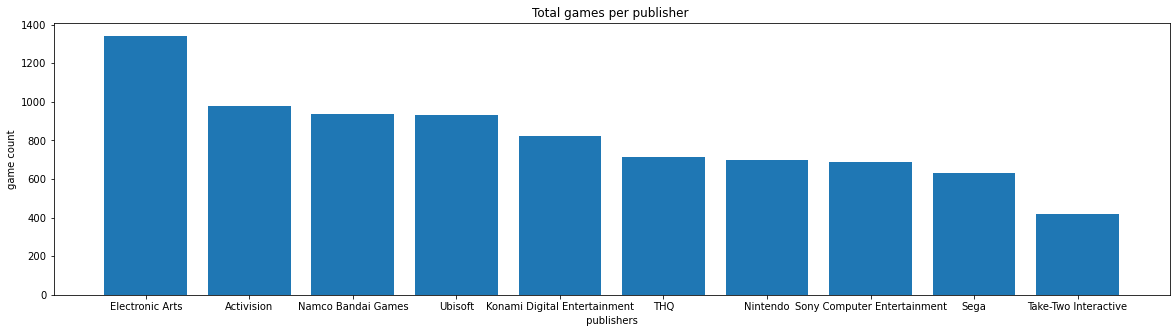

In [76]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.bar(PublisherGroupedDataDFTop10gamenamecount.index,PublisherGroupedDataDFTop10gamenamecount['game_name'])
plt.title('Total games per publisher ')
plt.xlabel(' publishers ')
plt.ylabel('game count')
plt.show()

In [77]:
PublisherGroupedDataDF2 = gamesDF.groupby('publisher').sum(['global_sales'])
PublisherGroupedDataDFTop10global_sales = PublisherGroupedDataDF2.nlargest(10,'global_sales')
PublisherGroupedDataDFTop10global_sales

,year_of_release,critic_score,critic_count,user_count,global_sales,median_Critic_score,median_critic_count,critic_score_Z_score_approach3
publisher,,,,,,,,
Nintendo,1402730.0,23327.0,12974.0,58061.0,1786.72,49320.0,14350.0,19.076929
Electronic Arts,2690621.0,65386.0,17778.0,157277.0,1098.71,96753.5,27642.0,109.361810
Activision,1959140.0,39196.0,15174.0,119603.0,725.14,68781.5,21702.0,50.068963
Sony Computer Entertainment,1375104.0,15828.0,2981.0,78342.0,606.27,48462.0,14035.0,-6.044747
Ubisoft,1865380.0,18109.0,-5978.0,65929.0,470.16,65023.5,19272.0,-19.885787
Take-Two Interactive,845488.0,21966.0,9568.0,108525.0,403.58,30238.5,9116.0,39.393868
THQ,1428311.0,16910.0,-1231.0,18275.0,338.11,49534.5,14709.0,-4.577807
Konami Digital Entertainment,1654446.0,22082.0,7101.0,32389.0,277.36,58911.5,16613.0,3.449303
Sega,1261365.0,22051.0,9481.0,34116.0,268.06,44751.0,13310.0,20.976680


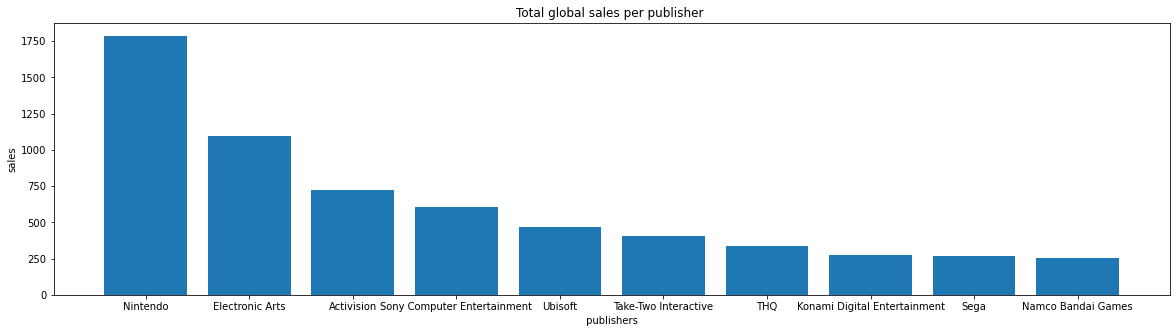

In [78]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.bar(PublisherGroupedDataDFTop10global_sales.index, PublisherGroupedDataDFTop10global_sales['global_sales'])
plt.title('Total global sales per publisher ')
plt.xlabel(' publishers ')
plt.ylabel('sales')
plt.show()

In [79]:
# If the requirement is to get top 10 publishers based on both the parameters together (game count and total sales) , then an explanation is required for sequency or formula of ordering to be taken
# or may be plotting together by merging the 2 result datafra,es like beliow 
df3 = pd.merge(PublisherGroupedDataDFTop10global_sales, PublisherGroupedDataDFTop10gamenamecount, left_index=False, right_index=False, on='publisher')

In [80]:
df3[['global_sales_x' , 'game_name' ]]

,global_sales_x,game_name
publisher,,
Nintendo,1786.72,700
Electronic Arts,1098.71,1341
Activision,725.14,976
Sony Computer Entertainment,606.27,686
Ubisoft,470.16,929
Take-Two Interactive,403.58,421
THQ,338.11,712
Konami Digital Entertainment,277.36,825
Sega,268.06,629


<Figure size 3600x360 with 0 Axes>

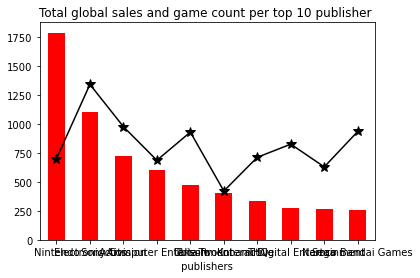

In [81]:
import matplotlib.pyplot as plt
plt.figure(figsize=(50,5))
fig, ax = plt.subplots()

df3['global_sales_x'].plot(kind='bar', color='red')
df3['game_name'].plot(kind='line', marker='*', color='black', ms=10)


plt.title('Total global sales and game count per top 10 publisher ')
plt.xlabel(' publishers ')

plt.show()

#### PART 2 : DATA MODELLING

In [82]:
### Predictive Analytics :  predicting whether a video game will be popular or not ? # Sales target variable : (greater than 500,000 units sold)

Things to consider:
● How will you deal with missing data? With outliers?
● What transformations are relevant?
● Can you engineer any new features?
● Why did you select your chosen features? 
● What hyperparameters did you tune? Why? 
● How will you test the effectiveness of your model? Why did you choose this metric(s)?
● Why is your model appropriate for this task?
● What additional data would you collect to augment this dataset?

In [83]:
gamesDF

,game_name,platform,year_of_release,genre,publisher,developer,critic_score,critic_count,user_score,user_count,esrb_rating,global_sales,median_Critic_score,median_critic_count,critic_score_Z_score_approach3
0,Wii Sports,Wii,2006.0,Sports,Nintendo,Nintendo,76.0,51.0,8,322.0,E,82.53,75.0,18.0,0.177386
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,NaN,0.0,NaN,NaN,NaN,NaN,40.24,69.0,17.0,-0.089982
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,Nintendo,82.0,73.0,8.3,709.0,E,35.52,69.0,17.0,0.198494
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,Nintendo,80.0,73.0,8,192.0,E,32.77,75.0,18.0,0.191458
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,NaN,0.0,NaN,NaN,NaN,NaN,31.37,74.0,30.0,-0.089982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16437,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,NaN,0.0,NaN,NaN,NaN,NaN,0.01,68.0,23.0,-0.089982
16438,LMA Manager 2007,X360,2006.0,Sports,Codemasters,NaN,0.0,NaN,NaN,NaN,NaN,0.01,75.0,18.0,-0.089982
16439,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,NaN,0.0,NaN,NaN,NaN,NaN,0.01,66.0,17.0,-0.089982
16440,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,NaN,0.0,NaN,NaN,NaN,NaN,0.01,69.0,17.0,-0.089982


In [84]:
# How will you deal with missing data? 
# Categorical features will be replaced by mode
# Numerical features will be replaced by mean

# Given the limited time, I am going to remove all the rows with null values, 
# otherwise, I would have used the above mentioned mean and mode approach to get better missing values handling, specially because there are sales from the missing value columsn. 


In [85]:
CompleteGamesDF = gamesDF.dropna( axis=0, how="any", thresh=None, subset=None, inplace=False)

In [86]:
CompleteGamesDF

,game_name,platform,year_of_release,genre,publisher,developer,critic_score,critic_count,user_score,user_count,esrb_rating,global_sales,median_Critic_score,median_critic_count,critic_score_Z_score_approach3
0,Wii Sports,Wii,2006.0,Sports,Nintendo,Nintendo,76.0,51.0,8,322.0,E,82.53,75.0,18.0,0.177386
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,Nintendo,82.0,73.0,8.3,709.0,E,35.52,69.0,17.0,0.198494
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,Nintendo,80.0,73.0,8,192.0,E,32.77,75.0,18.0,0.191458
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,Nintendo,89.0,65.0,8.5,431.0,E,29.80,69.0,17.0,0.223119
7,Wii Play,Wii,2006.0,Misc,Nintendo,Nintendo,58.0,41.0,6.6,129.0,E,28.92,69.0,17.0,0.114062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16390,E.T. The Extra-Terrestrial,GBA,2001.0,Action,NewKidCo,Fluid Studios,46.0,4.0,2.4,21.0,E,0.01,68.0,23.0,0.071846
16400,Mortal Kombat: Deadly Alliance,GBA,2002.0,Fighting,Midway Games,Criterion Games,81.0,12.0,8.8,9.0,M,0.01,72.0,25.0,0.194976
16419,Metal Gear Solid V: Ground Zeroes,PC,2014.0,Action,Konami Digital Entertainment,Kojima Productions,80.0,20.0,7.6,412.0,M,0.01,68.0,23.0,0.191458
16423,Breach,PC,2011.0,Shooter,Destineer,Atomic Games,61.0,12.0,5.8,43.0,T,0.01,73.0,32.0,0.124616


In [87]:
CompleteGamesDF

,game_name,platform,year_of_release,genre,publisher,developer,critic_score,critic_count,user_score,user_count,esrb_rating,global_sales,median_Critic_score,median_critic_count,critic_score_Z_score_approach3
0,Wii Sports,Wii,2006.0,Sports,Nintendo,Nintendo,76.0,51.0,8,322.0,E,82.53,75.0,18.0,0.177386
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,Nintendo,82.0,73.0,8.3,709.0,E,35.52,69.0,17.0,0.198494
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,Nintendo,80.0,73.0,8,192.0,E,32.77,75.0,18.0,0.191458
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,Nintendo,89.0,65.0,8.5,431.0,E,29.80,69.0,17.0,0.223119
7,Wii Play,Wii,2006.0,Misc,Nintendo,Nintendo,58.0,41.0,6.6,129.0,E,28.92,69.0,17.0,0.114062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16390,E.T. The Extra-Terrestrial,GBA,2001.0,Action,NewKidCo,Fluid Studios,46.0,4.0,2.4,21.0,E,0.01,68.0,23.0,0.071846
16400,Mortal Kombat: Deadly Alliance,GBA,2002.0,Fighting,Midway Games,Criterion Games,81.0,12.0,8.8,9.0,M,0.01,72.0,25.0,0.194976
16419,Metal Gear Solid V: Ground Zeroes,PC,2014.0,Action,Konami Digital Entertainment,Kojima Productions,80.0,20.0,7.6,412.0,M,0.01,68.0,23.0,0.191458
16423,Breach,PC,2011.0,Shooter,Destineer,Atomic Games,61.0,12.0,5.8,43.0,T,0.01,73.0,32.0,0.124616


In [88]:
# Creating target  variable '
import numpy as np
CompleteGamesDF['Popular'] = np.where(CompleteGamesDF['global_sales'] > 0.5 , 1, 0)

C:\Users\lavin\AppData\Local\Temp\ipykernel_29832\319537588.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CompleteGamesDF['Popular'] = np.where(CompleteGamesDF['global_sales'] > 0.5 , 1, 0)


In [89]:
# Feature Transformation - for platform, genre , publisher, developer
#pd.get_dummies(CompleteGamesDF, columns=['platform'])
# not going with this approach, as it will make the number of feature values too high

In [90]:
Mean_encoded_platform = CompleteGamesDF.groupby(['platform'])['global_sales'].mean().to_dict()
  
CompleteGamesDF['PlatformName'] =  CompleteGamesDF['platform'].map(Mean_encoded_platform)
CompleteGamesDF

C:\Users\lavin\AppData\Local\Temp\ipykernel_29832\1612543923.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CompleteGamesDF['PlatformName'] =  CompleteGamesDF['platform'].map(Mean_encoded_platform)


,game_name,platform,year_of_release,genre,publisher,developer,critic_score,critic_count,user_score,user_count,esrb_rating,global_sales,median_Critic_score,median_critic_count,critic_score_Z_score_approach3,Popular,PlatformName
0,Wii Sports,Wii,2006.0,Sports,Nintendo,Nintendo,76.0,51.0,8,322.0,E,82.53,75.0,18.0,0.177386,1,1.365466
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,Nintendo,82.0,73.0,8.3,709.0,E,35.52,69.0,17.0,0.198494,1,1.365466
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,Nintendo,80.0,73.0,8,192.0,E,32.77,75.0,18.0,0.191458,1,1.365466
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,Nintendo,89.0,65.0,8.5,431.0,E,29.80,69.0,17.0,0.223119,1,0.817735
7,Wii Play,Wii,2006.0,Misc,Nintendo,Nintendo,58.0,41.0,6.6,129.0,E,28.92,69.0,17.0,0.114062,1,1.365466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16390,E.T. The Extra-Terrestrial,GBA,2001.0,Action,NewKidCo,Fluid Studios,46.0,4.0,2.4,21.0,E,0.01,68.0,23.0,0.071846,0,0.553824
16400,Mortal Kombat: Deadly Alliance,GBA,2002.0,Fighting,Midway Games,Criterion Games,81.0,12.0,8.8,9.0,M,0.01,72.0,25.0,0.194976,0,0.553824
16419,Metal Gear Solid V: Ground Zeroes,PC,2014.0,Action,Konami Digital Entertainment,Kojima Productions,80.0,20.0,7.6,412.0,M,0.01,68.0,23.0,0.191458,0,0.287754
16423,Breach,PC,2011.0,Shooter,Destineer,Atomic Games,61.0,12.0,5.8,43.0,T,0.01,73.0,32.0,0.124616,0,0.287754


In [91]:
Mean_encoded_publisher = CompleteGamesDF.groupby(['publisher'])['global_sales'].mean().to_dict()
  
CompleteGamesDF['PublisherName'] =  CompleteGamesDF['publisher'].map(Mean_encoded_publisher)
CompleteGamesDF

C:\Users\lavin\AppData\Local\Temp\ipykernel_29832\1716068261.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CompleteGamesDF['PublisherName'] =  CompleteGamesDF['publisher'].map(Mean_encoded_publisher)


,game_name,platform,year_of_release,genre,publisher,developer,critic_score,critic_count,user_score,user_count,esrb_rating,global_sales,median_Critic_score,median_critic_count,critic_score_Z_score_approach3,Popular,PlatformName,PublisherName
0,Wii Sports,Wii,2006.0,Sports,Nintendo,Nintendo,76.0,51.0,8,322.0,E,82.53,75.0,18.0,0.177386,1,1.365466,2.919210
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,Nintendo,82.0,73.0,8.3,709.0,E,35.52,69.0,17.0,0.198494,1,1.365466,2.919210
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,Nintendo,80.0,73.0,8,192.0,E,32.77,75.0,18.0,0.191458,1,1.365466,2.919210
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,Nintendo,89.0,65.0,8.5,431.0,E,29.80,69.0,17.0,0.223119,1,0.817735,2.919210
7,Wii Play,Wii,2006.0,Misc,Nintendo,Nintendo,58.0,41.0,6.6,129.0,E,28.92,69.0,17.0,0.114062,1,1.365466,2.919210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16390,E.T. The Extra-Terrestrial,GBA,2001.0,Action,NewKidCo,Fluid Studios,46.0,4.0,2.4,21.0,E,0.01,68.0,23.0,0.071846,0,0.553824,0.010000
16400,Mortal Kombat: Deadly Alliance,GBA,2002.0,Fighting,Midway Games,Criterion Games,81.0,12.0,8.8,9.0,M,0.01,72.0,25.0,0.194976,0,0.553824,0.428544
16419,Metal Gear Solid V: Ground Zeroes,PC,2014.0,Action,Konami Digital Entertainment,Kojima Productions,80.0,20.0,7.6,412.0,M,0.01,68.0,23.0,0.191458,0,0.287754,0.565041
16423,Breach,PC,2011.0,Shooter,Destineer,Atomic Games,61.0,12.0,5.8,43.0,T,0.01,73.0,32.0,0.124616,0,0.287754,0.086250


In [92]:
Mean_encoded_genre = CompleteGamesDF.groupby(['genre'])['global_sales'].mean().to_dict()
  
CompleteGamesDF['GenreName'] =  CompleteGamesDF['genre'].map(Mean_encoded_genre)
CompleteGamesDF

C:\Users\lavin\AppData\Local\Temp\ipykernel_29832\3646060270.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CompleteGamesDF['GenreName'] =  CompleteGamesDF['genre'].map(Mean_encoded_genre)


,game_name,platform,year_of_release,genre,publisher,developer,critic_score,critic_count,user_score,user_count,esrb_rating,global_sales,median_Critic_score,median_critic_count,critic_score_Z_score_approach3,Popular,PlatformName,PublisherName,GenreName
0,Wii Sports,Wii,2006.0,Sports,Nintendo,Nintendo,76.0,51.0,8,322.0,E,82.53,75.0,18.0,0.177386,1,1.365466,2.919210,0.883379
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,Nintendo,82.0,73.0,8.3,709.0,E,35.52,69.0,17.0,0.198494,1,1.365466,2.919210,0.817608
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,Nintendo,80.0,73.0,8,192.0,E,32.77,75.0,18.0,0.191458,1,1.365466,2.919210,0.883379
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,Nintendo,89.0,65.0,8.5,431.0,E,29.80,69.0,17.0,0.223119,1,0.817735,2.919210,0.935297
7,Wii Play,Wii,2006.0,Misc,Nintendo,Nintendo,58.0,41.0,6.6,129.0,E,28.92,69.0,17.0,0.114062,1,1.365466,2.919210,1.072211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16390,E.T. The Extra-Terrestrial,GBA,2001.0,Action,NewKidCo,Fluid Studios,46.0,4.0,2.4,21.0,E,0.01,68.0,23.0,0.071846,0,0.553824,0.010000,0.738135
16400,Mortal Kombat: Deadly Alliance,GBA,2002.0,Fighting,Midway Games,Criterion Games,81.0,12.0,8.8,9.0,M,0.01,72.0,25.0,0.194976,0,0.553824,0.428544,0.661243
16419,Metal Gear Solid V: Ground Zeroes,PC,2014.0,Action,Konami Digital Entertainment,Kojima Productions,80.0,20.0,7.6,412.0,M,0.01,68.0,23.0,0.191458,0,0.287754,0.565041,0.738135
16423,Breach,PC,2011.0,Shooter,Destineer,Atomic Games,61.0,12.0,5.8,43.0,T,0.01,73.0,32.0,0.124616,0,0.287754,0.086250,0.945000


In [93]:
Mean_encoded_developer = CompleteGamesDF.groupby(['developer'])['global_sales'].mean().to_dict()
  
CompleteGamesDF['DeveloperName'] =  CompleteGamesDF['developer'].map(Mean_encoded_developer)
CompleteGamesDF

C:\Users\lavin\AppData\Local\Temp\ipykernel_29832\2697885619.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CompleteGamesDF['DeveloperName'] =  CompleteGamesDF['developer'].map(Mean_encoded_developer)


,game_name,platform,year_of_release,genre,publisher,developer,critic_score,critic_count,user_score,user_count,esrb_rating,global_sales,median_Critic_score,median_critic_count,critic_score_Z_score_approach3,Popular,PlatformName,PublisherName,GenreName,DeveloperName
0,Wii Sports,Wii,2006.0,Sports,Nintendo,Nintendo,76.0,51.0,8,322.0,E,82.53,75.0,18.0,0.177386,1,1.365466,2.919210,0.883379,7.792647
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,Nintendo,82.0,73.0,8.3,709.0,E,35.52,69.0,17.0,0.198494,1,1.365466,2.919210,0.817608,7.792647
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,Nintendo,80.0,73.0,8,192.0,E,32.77,75.0,18.0,0.191458,1,1.365466,2.919210,0.883379,7.792647
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,Nintendo,89.0,65.0,8.5,431.0,E,29.80,69.0,17.0,0.223119,1,0.817735,2.919210,0.935297,7.792647
7,Wii Play,Wii,2006.0,Misc,Nintendo,Nintendo,58.0,41.0,6.6,129.0,E,28.92,69.0,17.0,0.114062,1,1.365466,2.919210,1.072211,7.792647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16390,E.T. The Extra-Terrestrial,GBA,2001.0,Action,NewKidCo,Fluid Studios,46.0,4.0,2.4,21.0,E,0.01,68.0,23.0,0.071846,0,0.553824,0.010000,0.738135,0.010000
16400,Mortal Kombat: Deadly Alliance,GBA,2002.0,Fighting,Midway Games,Criterion Games,81.0,12.0,8.8,9.0,M,0.01,72.0,25.0,0.194976,0,0.553824,0.428544,0.661243,0.844583
16419,Metal Gear Solid V: Ground Zeroes,PC,2014.0,Action,Konami Digital Entertainment,Kojima Productions,80.0,20.0,7.6,412.0,M,0.01,68.0,23.0,0.191458,0,0.287754,0.565041,0.738135,1.067500
16423,Breach,PC,2011.0,Shooter,Destineer,Atomic Games,61.0,12.0,5.8,43.0,T,0.01,73.0,32.0,0.124616,0,0.287754,0.086250,0.945000,0.010000


In [94]:
CompleteGamesDF.describe()

,year_of_release,critic_score,critic_count,user_count,global_sales,median_Critic_score,median_critic_count,critic_score_Z_score_approach3,Popular,PlatformName,PublisherName,GenreName,DeveloperName
count,6835.000000,6835.000000,6835.000000,6835.000000,6835.000000,6835.000000,6835.000000,6835.000000,6835.000000,6835.000000,6835.000000,6835.000000,6835.000000
mean,2007.437747,51.115143,9.857059,155.337674,0.776559,70.882955,22.523482,0.089841,0.354206,0.776559,0.776559,0.776559,0.776559
std,4.209440,438.970249,437.372279,735.570916,1.962163,2.791726,5.521567,1.544294,0.478307,0.317204,0.588336,0.178347,1.131795
min,1985.000000,-9999.000000,-9999.000000,-9999.000000,0.010000,66.000000,14.000000,-35.266383,0.000000,0.261695,0.010000,0.260712,0.010000
25%,2004.000000,62.000000,14.000000,11.000000,0.110000,68.000000,17.000000,0.128134,0.000000,0.480742,0.396375,0.704320,0.248571
50%,2007.000000,72.000000,24.000000,27.000000,0.290000,70.000000,23.000000,0.163314,0.000000,0.829168,0.684157,0.738135,0.518889
75%,2010.000000,80.000000,39.000000,88.000000,0.750000,73.000000,25.000000,0.191458,1.000000,0.994224,0.920754,0.883379,0.910000
max,2016.000000,98.000000,113.000000,10665.000000,82.530000,75.000000,32.000000,0.254781,1.000000,1.377000,2.919210,1.072211,21.810000


                                year_of_release  critic_score  critic_count  \
year_of_release                        1.000000     -0.010861     -0.001668   
critic_score                          -0.010861      1.000000      0.999087   
critic_count                          -0.001668      0.999087      1.000000   
user_count                             0.152571      0.609054      0.614898   
global_sales                           0.006639      0.021229      0.026471   
median_Critic_score                   -0.058253      0.012924      0.009108   
median_critic_count                    0.078033      0.039209      0.047394   
critic_score_Z_score_approach3        -0.010861      1.000000      0.999087   
Popular                                0.016150      0.036282      0.041410   
PlatformName                           0.156039     -0.028814     -0.021574   
PublisherName                          0.002828      0.034108      0.038985   
GenreName                             -0.007934     

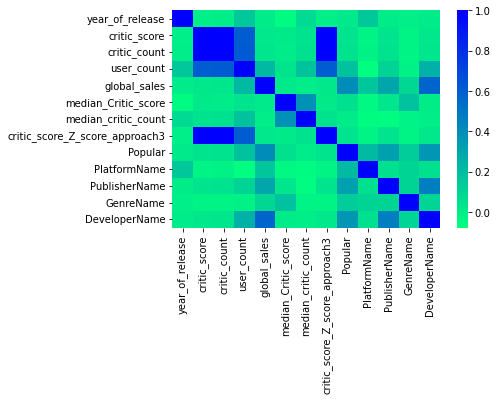

In [95]:
# Correlations in CompleteGamesDF
import seaborn as sns
print(CompleteGamesDF.corr())
sns.heatmap(CompleteGamesDF.corr(), cmap="winter_r")
plt.show()
# Based on correlation values with target , we can see ,Model should definitely have Developer name, Publisher name, Platform_name, USer_count
# I am not taking year_sales right now, as it needs transformation, and more time, to analyse
# We can omit critic count, critic score, as they have less correlation with global sales our target, and as it has high correlation with critic score and with user count, which we have already taken

In [96]:
CompleteGamesDF.corr().unstack().abs().sort_values().drop_duplicates()

median_Critic_score             DeveloperName                     0.001463
year_of_release                 critic_count                      0.001668
global_sales                    median_critic_count               0.002292
year_of_release                 PublisherName                     0.002828
DeveloperName                   median_critic_count               0.003765
                                                                    ...   
critic_count                    user_count                        0.614898
                                critic_score_Z_score_approach3    0.999087
critic_score                    critic_count                      0.999087
year_of_release                 year_of_release                   1.000000
critic_score_Z_score_approach3  critic_score                      1.000000
Length: 78, dtype: float64

In [97]:
# Check distribution of selected features : 
# Developer name, Publisher name, Platform_name, USer_count

# How will you deal withWith outliers?
# Will do this if time permits, Outliers can be detected with multiple ways : 
# First is plot distributions and analyze the presence of outliers
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])
plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])
plt.show()
# using boxplots
#sns.boxplot(data=df,x=df["Length"])
#plt.title("Boxplot of Swiss Banknote Length ") , We can filter on the top 50 percent (or 25-75 %ile)
# Trimming
# Capping 

In [98]:
#### Modelling

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix

In [99]:
CompleteGamesDF.columns

Index(['game_name', 'platform', 'year_of_release', 'genre', 'publisher',
       'developer', 'critic_score', 'critic_count', 'user_score', 'user_count',
       'esrb_rating', 'global_sales', 'median_Critic_score',
       'median_critic_count', 'critic_score_Z_score_approach3', 'Popular',
       'PlatformName', 'PublisherName', 'GenreName', 'DeveloperName'],
      dtype='object')

In [100]:
# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split
#Developer name, Publisher name, Platform_name, USer_count
# splitting the data
XAll = CompleteGamesDF[['DeveloperName' , 'PublisherName' , 'PlatformName' , 'user_count']]
y = CompleteGamesDF['Popular']
x_train, x_test, y_train, y_test = train_test_split(XAll, y, test_size = 0.2, random_state = 42)

In [101]:
RFClassifier = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,max_depth=2, random_state=0)
RFClassifier.fit(x_train, y_train)
# Actual class predictions
rf_predictions = RFClassifier.predict(x_test)


y_val_1 = RFClassifier.predict_proba(x_test) 

In [102]:
y_val_1
print("Validation accuracy: ", sum(pd.DataFrame(y_val_1).idxmax(axis=1).values == y_test)/len(y_test))

Validation accuracy:  0.7885881492318947


In [103]:
log_reg = LogisticRegression().fit(x_train, y_train)
y_val_2 = log_reg.predict_proba(x_test)
print("Validation accuracy: ", sum(pd.DataFrame(y_val_2).idxmax(axis=1).values == y_test)/len(y_test))

Validation accuracy:  0.77542062911485


In [104]:
# Similar accuracies from both, the logistic regressor, and the random regressor, 

##### NEXT STEPS if time allowed ##############
# My next  step is going to take Random Classifier, and then create a grid CV with its multiple possible hyperparamters combinations, and then from the result of the CV scores, i am goint to choose the best model and use that for predications ahead.
# Parameters that I can try with : in RF , Max_depth, No of estimators, etc

# Why Random Forest : It works well with the combinations of categorical as well as numerical data, I also tried it out for a single split of training and test, and a set of params, and it seems to give good scores. 
# We can definitely try out boosting algorithms as well, becuase they also work well with the categorical features and gives good results specially where tehre are too many variations in the training samples. 

In [105]:
RFClassifier = RandomForestClassifier(n_estimators=10, 
                               bootstrap = True,max_depth=3, random_state=0)
RFClassifier.fit(x_train, y_train)
# Actual class predictions
rf_predictions = RFClassifier.predict(x_test)


y_val_3 = RFClassifier.predict_proba(x_test) 

In [107]:
y_val_3
print("Validation accuracy: ", sum(pd.DataFrame(y_val_3).idxmax(axis=1).values == y_test)/len(y_test))

Validation accuracy:  0.8076079005120702


In [54]:
# Above variation in the parameters shows, we can increase the accuracy, given more time to try out multiple possible variations in max_depth, and number_of estimators. 
# We can also try including the critic_score variable, or more independent variables, to check if that increase accuracy. 

In [55]:
# Also, For Feature Selection, I can juist create RF cLassifier using all features, and then use feature_importance values from the trained model, to see the importance of each feature in the dataset 

Things to consider:
● How will you deal with missing data? With outliers?
        Missing data - removed in this exercise, but we can analyze each variable more to knoe if we can do mean imputations / mode imputations for each variable. given more time
        Outliers - We can use multiple methods, i mentioned above in a comment. Did not do it here as no time. 
● What transformations are relevant?
    Categorical variables -> Numerical  Variables , must , because you wont be able to see its correlation with target, and do feature selection otherwise.
● Can you engineer any new features?
    Yes, Global Sales divided by USer COunt can give us almost the sales price per unit, and that will be usually a deciding factor for more sales / popularity
    
● Why did you select your chosen features? 
 - I have explained this well above, i used correlations with target variable to select features, and used correlations with each other to remove features, I also mentioned that RF classifier feature importance can be used as well. 
 
● What hyperparameters did you tune? Why? 
    - max depth of RF classifier, it selectes how much fitiing is allowed per tree, generalizes model if lesser model depth used
    - no_estimators - similar explaination
    - many mpore combinations possible, given more time
● How will you test the effectiveness of your model? Why did you choose this metric(s)?
    - accuracy %age gives a quick check of the model selection. We can also look at confiusion metrics, if either True Positives or True Negavtives class results is very important for us in our usecase
    
● Why is your model appropriate for this task?
 - explained be,low RF classifier
● What additional data would you collect to augment this dataset?
- Sale proce per product, Region Data , customer age etc , all of this can help further increase, '

Include explanations in your submission detailing your approach, including any assumptions you 
made. This can be in the form of a short summary in markdown format, or through sufficient
comments throughout your notebook or script. Make sure to address the considerations above 
in your explanations.